<font size=6  color=#003366> [LEPL1109] - STATISTICS AND DATA SCIENCES <br><br> 
(PART II) TP 02 - When the best is the enemy of the good...   </font> <br><br><br>

<font size=5  color=#003366>
Prof. D. Hainaut<br>
Prof. L. Jacques<br>

<br><br>
Sébastien Colla [SC]    (sebastien.colla@uclouvain.be)<br> 
Anne-Sophie Collin [ASC]   (anne-sophie.collin@uclouvain.be)<br>
Jérome Eertmans [JE]   (jerome.eertmans@uclouvain.be)<br>
Dani Manjah [DM]    (dani.manjah@uclouvain.be)<br> 
Guillaume Van Dessel [GVD] (guillaume.vandessel@uclouvain.be)<br>
Loïc Van Hoorebeeck [LVH]  (loic.vanhoorebeeck@uclouvain.be)<br> 
<div style="text-align: right"> Version 4.3 (2021-11-2)</div>

<br><br>
</font>

<br>

<font size=7 color=#009999> 1. The problem of overfitting </font> <br><br> 

*Protip: Have a quick look to [`theory_tp2.pdf`](theory_tp2.pdf), for some reminder about some mathematical tools required to solve this exercice, as well as some complementatry information that can help your understanding.* 

<br>
<font size=5 color=#009999> 1.1  Starter - A first taste of overfitting </font> <br>

Assume a target variable $y \in \mathbb{R} $ from a single feature $x \in \mathbb{R}$. We want to create a polynomial model from a sample of $N$ observations: $(\textbf{x}, \textbf{y}) \in \mathbb{R}^{N} \times \mathbb{R}^{N}$. We will analyze three different regression models:

- $f_0$: A *constant* linear regression model;
- $f_1$: A linear regression model;
- $f_4$: A polynomial (degree 4) regression model.

The models are evaluated using the least-squares error between their predictions based on $\textbf{x}$ and the observations $\textbf{y}$: $$||\mathbf{f}_p(\textbf{x}) - \textbf{y}||_2^2 \, ,$$

for $p \in \left \{0, 1, 4 \right \}$.

<div class="alert alert-block alert-info">
<b>Link between polynomial approximations and linear regressions:</b> 
    The polynomial model considered here is the following:
    $$(f_p) \qquad \mathbf{y} =  \mathbf{f}_p(\mathbf{x})+ \boldsymbol{\epsilon} , $$
    where 
    $$ \mathbf{f}_p(\mathbf{x}) := \sum_{l=0}^p \beta_l \mathbf{x}^l ,$$
    while the power function applied to the vector $\mathbf{x}$ is taken component-wise.<br>
    This approximation problem can be written as a standard data science problem. Indeed, it suffices to consider the <b>Vandermonde matrix</b>, $\mathbf{V}_p$, of the data points:
    $$ \mathbf{V}_p :=        \begin{bmatrix}
            1 & x_1 & x_1^2 & \dots & x_1^p \\
            1 & x_2 & x_2^2 & \dots & x_2^p \\
            \vdots & \vdots & \vdots & \vdots \\
            1 & x_N & x_N^2 & \dots & x_N^p  \\
        \end{bmatrix}.$$ <br>
    Using this matrix, the model becomes a classical linear regression model
        $$ \qquad \mathbf{\hat{y}} = \mathbf{V}_p \boldsymbol{\beta}   . $$ <br>
    In this way, we transformed our initial problem of <em>polynomial curve fitting</em> of a single feature $x$ to a <em>linear regression</em> of a set of $(p+1)$ artificially created features $(1, x, x^2, \dots, x^p)$. Note that the Vandermonde matrix, $\textbf{V}_p$, corresponds to the <b>feature matrix</b>, usually denoted as $\textbf{X}$.
    
</div>

<br>

Therefore, the **evaluation of the models can be done through the cost function** (that should be as close to zero as possible):
$$||\textbf{V}_p \boldsymbol{\beta} - \textbf{y}||_2^2,$$
where $\beta$ is the vector of coefficients of the polynomial model.

Using this cost function, the optimal solution is called the solution in the *least-squares* sense and is computed as


$$\boldsymbol{\beta}^* = (\mathbf{V}_p^T \mathbf{V}_p)^{-1} \mathbf{V}_p^T \mathbf{y} \, . \qquad (1)$$

<br>

<div class="alert alert-warning">
<b>[Question 1] polynomial regression models </b>  <br><br>
    Given the data $(\mathbf{X}, \mathbf{y})$, and using equation (1), obtain the best polynomial models $f_0$, $f_1$ and $f_4$. Then use these models to get the predictions (<code>y_reg_p</code>) of your models at points <code>X_reg</code>.<br><br>    
            <b>Discussion: </b><br>
    <ol>
        <li>Compare all three models, and explain the performance of each one. Do you observe any problem? How to detect and overcome this problem in practice?</li>
        <li>Suppose you had split your data into train and test set, which model would have the best training error, and which model would have the best test error?</li>
        <li>Print and discuss the value of $\boldsymbol{\beta}$ for each model.</li>
    </ol><br><br>
    <b>Bonus question</b>: Discuss the uniqueness of $\boldsymbol{\beta}$.
    
    
</div> 



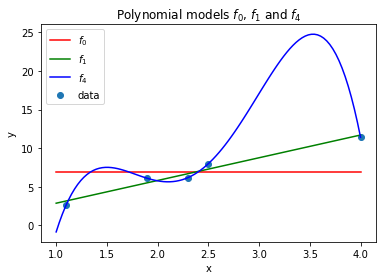

beta_f0 : 
 [[6.884]]
beta_f1 : 
 [[-0.05624113]
 [ 2.94078014]]
beta_f4 : 
 [[-160.0706574 ]
 [ 332.73415685]
 [-236.99761812]
 [  70.95984252]
 [  -7.45669532]]


In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data
X = np.array([[1.1, 1.9, 2.3, 2.5, 4]]).T
y = np.array([[2.7, 6.1, 6.2, 8, 11.42]]).T

#Points at which the model is evaluated
X_reg = np.reshape(np.linspace(1, 4, 100), (100, 1))

#f0
#Vandermonde matrices of degree 0 on the data (V_0) and on the evaluation points (V_reg_0)
V_0 = np.reshape(np.ones_like(X), (len(X), 1))
V_reg_0 = np.ones_like(X_reg)
#TODO
beta_f0 = np.linalg.inv(np.transpose(V_0)@V_0)@np.transpose(V_0)@y
y_reg_0 = V_reg_0@beta_f0

#f1

#Vandermonde matrices of degree 1 on the data (V_1) and on the evaluation points (V_reg_1)
V_1 = np.hstack((np.ones_like(X), X))
V_reg_1 = np.hstack((np.ones_like(X_reg), X_reg)) 
#TODO
beta_f1 = np.linalg.inv(np.transpose(V_1)@V_1)@np.transpose(V_1)@y
y_reg_1 = V_reg_1@beta_f1

#f4

#Vandermonde matrices of degree 4 on the data (V_4) and on the evaluation points (V_reg_4)
V_4 = np.hstack((np.ones_like(X), X, np.power(X, 2), np.power(X, 3), np.power(X, 4)))
V_reg_4 = np.hstack((np.ones_like(X_reg), X_reg, np.power(X_reg, 2), np.power(X_reg, 3), np.power(X_reg, 4))) 

#TODO
beta_f4 = np.linalg.inv(np.transpose(V_4)@V_4)@np.transpose(V_4)@y
y_reg_4 = V_reg_4@beta_f4

plt.scatter(X, y, label='data')
plt.plot(X_reg, y_reg_0, color='r', label='$f_0$')
plt.plot(X_reg, y_reg_1, color='g', label='$f_1$')
plt.plot(X_reg, y_reg_4, color='b', label='$f_4$')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial models $f_0$, $f_1$ and $f_4$")

plt.legend()
plt.show()

#TODO: print \beta 
print("beta_f0 : \n", beta_f0)
print("beta_f1 : \n",beta_f1)
print("beta_f4 : \n",beta_f4)

<br>
<font size=5 color=#009999> 1.2 Main course - Regularization as a tool  </font> <br>

We propose to use *Tikhonov regularization* as a tool to avoid our model to overfit the data. This is done by penalizing the euclidean norm of the model parameters. In particular, let $\boldsymbol{\beta}$ be the parameters, the optimization problem to obtain our regression model is now

$$ \min_{\boldsymbol{\beta}} {|| V \boldsymbol{\beta} - \mathbf{y} ||_2^2 + \lambda || \boldsymbol{\beta}||_2^2},  $$

for a given metaparameter $\lambda \geq 0$.

The optimal solution is now

$$ \boldsymbol{\beta}^* = (\mathbf{V_p}^T \mathbf{V_p} + \lambda \boldsymbol{I}_{p+1})^{-1} (\mathbf{V_p}^T \mathbf{y}), $$

with $\textbf{I}_{p+1}$ the appropriate identity matrix.

<div class="alert alert-warning">
<b>[Question 2] Regularization of polynomial regression models </b>  <br>
<ol>
    <li> <b>Using the regularization: </b> Modify you code of the previous question to account for the regularization. How do the models perform with $\lambda = 10^6$, $1$, $10^{-3}$ or $10^{-5}$? Print and discuss the values of $\boldsymbol{\beta}$.

Give two advantages of such regularization.<br> <br>
            <li> <b>  Playing with $\lambda$: </b>Interpret the solution for $\lambda = 0$ and $\lambda \to \infty$, how would you choose the best $\lambda$?

Propose a modification of the objective to obtain a better solution for $\lambda \to \infty$. 
</ol><br><br>
    <b>Bonus question</b>: Discuss now the uniqueness of $\boldsymbol{\beta}$ for $\lambda>0$.
</div> 


Lambda =  1000000


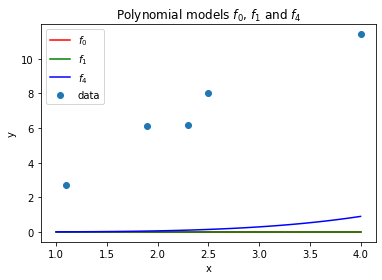

beta_f0 : 
 [[3.44198279e-05]]
beta_f1 : 
 [[3.44187128e-05]
 [9.44965360e-05]]
beta_f4 : 
 [[3.32198746e-05]
 [9.02146981e-05]
 [2.74828428e-04]
 [9.15518322e-04]
 [3.25430114e-03]]


Lambda =  1


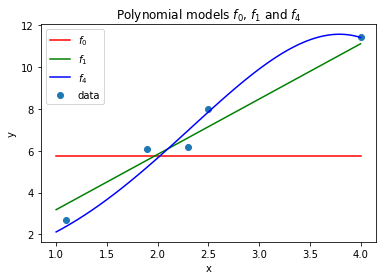

beta_f0 : 
 [[5.73666667]]
beta_f1 : 
 [[0.54417597]
 [2.64024951]]
beta_f4 : 
 [[ 0.57964569]
 [ 0.66685146]
 [ 0.63503483]
 [ 0.33105409]
 [-0.09058377]]


Lambda =  0.001


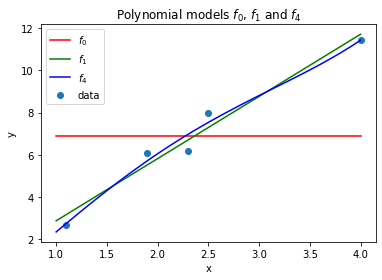

beta_f0 : 
 [[6.88262348]]
beta_f1 : 
 [[-0.05462496]
 [ 2.94009995]]
beta_f4 : 
 [[-1.43762517]
 [ 3.15129731]
 [ 1.12998342]
 [-0.55413791]
 [ 0.06891514]]


Lambda =  1e-05


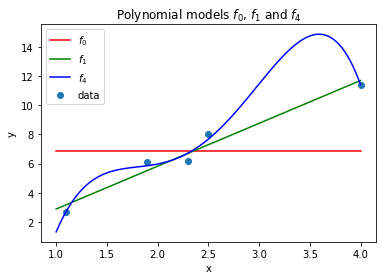

beta_f0 : 
 [[6.88398623]]
beta_f1 : 
 [[-0.05622495]
 [ 2.94077333]]
beta_f4 : 
 [[-53.08199033]
 [110.34964883]
 [-76.24717547]
 [ 22.66331765]
 [ -2.37261942]]




In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data
X = np.array([[1.1, 1.9, 2.3, 2.5, 4]]).T
y = np.array([[2.7, 6.1, 6.2, 8, 11.42]]).T

X_reg = np.reshape(np.linspace(1, 4, 100), (100, 1))

# We advise you to use and adapt the code from the previous exercise
for l in [10**6, 1, 10**-3, 10**-5] : 
    
    print("Lambda = ", l)
    #f0
    #Vandermonde matrices of degree 0 on the data (V_0) and on the evaluation points (V_reg_0)
    V_0 = np.reshape(np.ones_like(X), (len(X), 1))
    V_reg_0 = np.ones_like(X_reg)
    #TODO
    beta_f0 = np.linalg.inv(np.transpose(V_0)@V_0 + l*np.eye(1))@np.transpose(V_0)@y
    y_reg_0 = V_reg_0@beta_f0

    #f1

    #Vandermonde matrices of degree 1 on the data (V_1) and on the evaluation points (V_reg_1)
    V_1 = np.hstack((np.ones_like(X), X))
    V_reg_1 = np.hstack((np.ones_like(X_reg), X_reg)) 
    #TODO
    beta_f1 = np.linalg.inv(np.transpose(V_1)@V_1 + l*np.eye(2))@np.transpose(V_1)@y
    y_reg_1 = V_reg_1@beta_f1

    #f4

    #Vandermonde matrices of degree 4 on the data (V_4) and on the evaluation points (V_reg_4)
    V_4 = np.hstack((np.ones_like(X), X, np.power(X, 2), np.power(X, 3), np.power(X, 4)))
    V_reg_4 = np.hstack((np.ones_like(X_reg), X_reg, np.power(X_reg, 2), np.power(X_reg, 3), np.power(X_reg, 4))) 

    #TODO
    beta_f4 = np.linalg.inv(np.transpose(V_4)@V_4 + l*np.eye(5))@np.transpose(V_4)@y
    y_reg_4 = V_reg_4@beta_f4

    plt.scatter(X, y, label='data')
    plt.plot(X_reg, y_reg_0, color='r', label='$f_0$')
    plt.plot(X_reg, y_reg_1, color='g', label='$f_1$')
    plt.plot(X_reg, y_reg_4, color='b', label='$f_4$')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polynomial models $f_0$, $f_1$ and $f_4$")

    plt.legend()
    plt.show()

    #TODO: print \beta 
    print("beta_f0 : \n", beta_f0)
    print("beta_f1 : \n",beta_f1)
    print("beta_f4 : \n",beta_f4)
    print("\n")

<br>
<font size=5 color=#009999> 1.3 Dessert - What if we overfit the overfitting? </font> <br>

<div class="alert alert-warning">
<b>[Question 3] When we overfit the overfitting... </b>  <br>
<ol>
    <li><b> How to choose $\lambda$? </b> Let us now focus on $f_4$. Propose a procedure to choose the value of $\lambda$.

(Hint: It may be useful to compare training and test error.)
        
How to assess the quality of your regularized model?<br> <br>
    <li> <b> Discussion: </b> we implemented for you a train/test procedure for choosing the best $\lambda$.<br><br>
        First, set <code>flag_lambda_0</code> to <samp>False</samp> and comment the two graphs. Does the value of the validation error seems intuitive to you? What can you conclude from the value of the test error? <br><br>
        Second, set <code>flag_lambda_0</code> to <samp>True</samp> to observe the behavior of your model without regularization. What can you conclude?
</ol>
</div> 





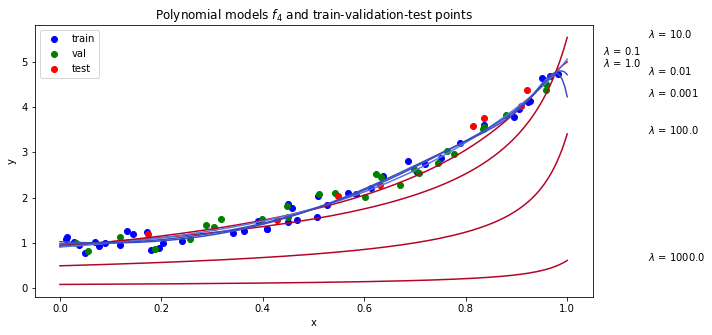

Optimal lambda is 0.13219411484660287


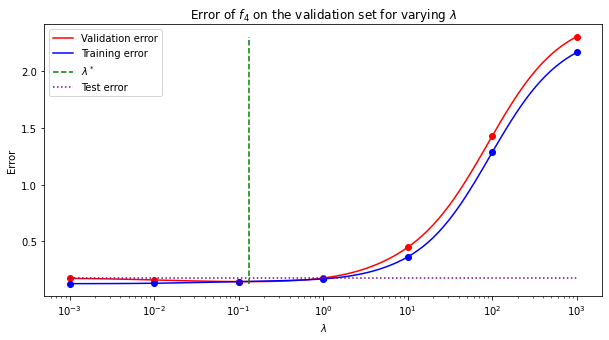

In [75]:
flag_lambda_0 = False

# Remark: nothing to code below!

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(40)

beta_true = [1.5, 2.4, 0, 1]  # True synthetic model

n_point = 80

X = np.random.rand(n_point, 1)  # Features
N = (np.random.rand(n_point, 1) - 0.5) * 0.5  # Additive noise
y = np.polyval(beta_true, X) + N  # Noisy target

_X, X_test, _y, y_test = train_test_split(X, y, test_size=0.1)  # 10% test set

X_train, X_val, y_train, y_val = train_test_split(
    _X, _y, test_size=0.366
)  # 0.33% validation set


n_train = X_train.shape[0]
n_test = X_test.shape[0]
n_val = X_val.shape[0]


X_plot = np.linspace(0, 1, 200)

# Plot the data with color discrimination for each set
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_val, y_val, color="green", label="val")
plt.scatter(X_test, y_test, color="red", label="test")
plt.legend()


# Vandermonde matrix
V_train = np.vander(np.reshape(X_train, n_train), increasing=False)

lamb_points = np.logspace(3, -3, num=7)  # 6 different lambda values

if flag_lambda_0:
    lamb_points = np.append(0, lamb_points)
colors = [mpl.cm.coolwarm(x) for x in lamb_points]


val_err_points = []
train_err_points = []
val_err_line = []
train_err_line = []

# First plot: vizualization of interpolation polynomial
# Loop through the 6 lambda values, compute the regularized model and plot the interpolation polynomial on [0, 1]
for (l, c) in zip(lamb_points, colors):
    beta = (
        np.linalg.inv(V_train.T @ V_train + l * np.eye(n_train, n_train))
        @ V_train.T
        @ y_train
    )
    plt.plot(X_plot, np.polyval(beta, X_plot), c=c)
    if l == 1.0:
        dx = 0.07
        dy = -0.1
    elif l == 0.1:
        dx = 0.07
        dy = +0.1
    else:
        dx = 0.16
        dy = 0
    plt.text(X_plot[-1] + dx, np.polyval(beta, X_plot[-1]) + dy, r"$\lambda$ = %s" % l)

    val_err_points.append(
        np.linalg.norm(np.polyval(beta, X_val) - y_val) / np.sqrt(n_val)
    )
    train_err_points.append(
        np.linalg.norm(np.polyval(beta, X_train) - y_train) / np.sqrt(n_train)
    )


# Second plot: vizualization of training and testing errors

lamb_line = np.logspace(3, -3, 100)  # More lambda values, used to plot error functions

for l in lamb_line:
    beta = (
        np.linalg.inv(V_train.T @ V_train + l * np.eye(n_train, n_train))
        @ V_train.T
        @ y_train
    )
    val_err_line.append(
        np.linalg.norm(np.polyval(beta, X_val) - y_val) / np.sqrt(n_val)
    )
    train_err_line.append(
        np.linalg.norm(np.polyval(beta, X_train) - y_train) / np.sqrt(n_train)
    )


plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial models $f_4$ and train-validation-test points")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(lamb_line, val_err_line, color="r", label="Validation error")
plt.plot(lamb_line, train_err_line, color="b", label="Training error")

if not flag_lambda_0:
    plt.xscale("log")

plt.scatter(lamb_points, val_err_points, color="r")
plt.scatter(lamb_points, train_err_points, color="b")


l_opt = lamb_line[np.argmin(val_err_line)]

print("Optimal lambda is", l_opt)

beta_opt = (
    np.linalg.inv(V_train.T @ V_train + l_opt * np.eye(n_train, n_train))
    @ V_train.T
    @ y_train
)
test_err = np.linalg.norm(np.polyval(beta_opt, X_test) - y_test) / np.sqrt(n_test)


plt.plot(
    [l_opt, l_opt],
    [np.min(train_err_line), np.max(val_err_line)],
    linestyle="dashed",
    color="green",
    label="$\lambda^*$",
)
plt.plot(
    [min(lamb_line), max(lamb_line)],
    [test_err, test_err],
    linestyle="dotted",
    color="purple",
    label="Test error",
)

plt.legend()

plt.xlabel("$\lambda$")
plt.ylabel("Error")
plt.title("Error of $f_4$ on the validation set for varying $\lambda$")
plt.show()

<br>
<font size=7 color=#009999>  2. Model and parameter selection </font> <br><br> 

You are interested in predicting the progression of diabete. For this purpose, you have access to different parameters such as age, sex, body mass index (BMI), average blood pressure and blood serum measurements. Your goal is to quantify the measure of disease progression. 

Let us first import the dataset (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes">load_diabetes</a> from sklearn). Note that there is no need to standardize the data as a preprocessing step has already been performed on them! 

We also split the dataset into a training and testing set, with test size 0.33.

In [76]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=1
)

To perform your regression problem, you consider three distinct methods, each of them with one parameter:

- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor">k-nearest neighbors</a>, with as parameter k, the number of considered neighbors.
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html">regularized linear regression </a> (also called ridge regression), with as parameter $\lambda$ (also called $\alpha$), the regularization strenght.  *Note the similarity with the previous exercise...*
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR">support vector machine</a> using linear kernel, with as parameter the regularization parameter $C$.


<div class="alert alert-warning">
<b>[Question 4]</b>  <br>
    <ol>
        <li>To compare those methods, you need an evaluation function, computing the quality of <code>y_pred</code> knowing <code>y_real</code>. Implement a function <code>evaluate</code> that takes as argument <code>y_pred</code> and <code>y_real</code> and returns $\frac{||y\_pred - y\_real||}{||y\_real||}$. Note that we aim to have this score as close to zero as possible! <br> <br>
        <li> Complete the function <code>evalParam</code> that takes as arguments: a set of methods, a set of dictionary of parameters for each method, a data set and an objective. This function evaluates each parameter using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold">K-folds</a> with 5 folds. Your K-folds should shuffle the data, with <code>random_state</code>=1. This function should return a list of vectors with the score of each parameter for each method. 
    </ol>
</div> 


<div class="alert alert-block alert-info">
<b>Example of use of the evalParam function:</b> <br><br>
    neigh = KNeighborsRegressor() <br>
    methods = [neigh]<br>
    paramN = [{"n_neighbors":1}, {"n_neighbors":5}, {"n_neighbors":10}]  <br>
    param = [paramN]<br>
    scores = evalParam(methods, param, X_train, y_train)<br>
    print(scores)<br>
</div>



In [100]:
from sklearn.model_selection import KFold
import numpy as np


""" -----------------------------------------------------------------------------------------
Evaluates the quality of y_pred knowing real values y_real as ||y_pred-y_real||/||y_real||
INPUT: 
    - y_pred: predicted objective
    - y_real: real objective
OUTPUT:
    - score: quality of the prediction: ||y_pred-y_real||/||y_real||
----------------------------------------------------------------------------------------- """


def evaluate(y_pred, y_real):

    score = np.linalg.norm(y_pred-y_real)/np.linalg.norm(y_real)

    return score


""" ------------------------------------------------------------------------------------------------
Evaluates the methods using different parameters via a K-folds with 5 folds
INPUT: 
    - methods: list of regressors to analyze
    - param: list of size len(methods) containing lists of parameters (in dictionary form) to evaluate
             in other words, param[i][j] is a dictionary of parmeters 
             (for example param[i][j] ={"n_neigbors":1}; while param[i] = paramN in the example above)
    - X: dataset
    - y: objective
OUTPUT:
    - score: list with same shape as param. score[i][j] = mean score over the folds, 
                                                         using method i with parameters param[i][j]
------------------------------------------------------------------------------------------------ """


def evalParam(methods, param, X, y):
    score = []
    X_arr = np.array(X)
    y_arr = np.array(y)

    for i in range(len(methods)):
        score.append(np.zeros(len(param[i])))

    kf = KFold(n_splits=5, shuffle=True, random_state=1)# TODO, KFolder

    # for train_index, test_index in ...: # TO CHANGE
    for train_index, val_index in kf.split(X):
        X_train, X_val = X_arr[train_index, :], X_arr[val_index, :]
        y_train, y_val = y_arr[train_index].ravel(), y_arr[val_index].ravel()
        # .ravel() transforms any ND-array into a 1D-array

        for meth in range(len(methods)):
            for p in range(len(param[meth])):
                methods[meth].set_params(**param[meth][p])
                methods[meth].fit(X_train, y_train)
                y_pred = methods[meth].predict(X_val)

                score[meth][p] += evaluate(y_pred, y_val)/kf.get_n_splits(X) #TODO score of meth on parameter p 
                #On moyenne car on évalue chaque paramètre pour les k fold

    return score


<div class="alert alert-warning">
<b>[Question 5]</b>  <br>
    Now use this function to evaluate your methods on the following parameters (using your training set!):
    <ul>
       <li> k = 1, 5, 10
       <li> lambda = 1e-5, 1e-3, 1
       <li> C = 1e-3, 1, 1e3
    </ul> <br>
    Which is the best method among the nine suggested here? 
</div> 

In [101]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

# Three methods to evaluate... and three "imports" provided. Is there some (magical) correlation between both? :-) 
neigh = KNeighborsRegressor()
ridge = Ridge()
svr = SVR()
methods = [neigh,ridge,svr]
paramN = [{"n_neighbors":1}, {"n_neighbors":5}, {"n_neighbors":10}]
paramR = [{"alpha":1e-5}, {"alpha":1e-3}, {"alpha":1}]
paramS = [{"C":1e-3}, {"C":1}, {"C":1e3}]
param = [paramN,paramR,paramS]
scores = evalParam(methods, param, X_train, y_train)
print(scores)

[array([0.46760047, 0.35666148, 0.34084619]), array([0.31951616, 0.31938247, 0.35079351]), array([0.46323832, 0.42771797, 0.42735749])]


<div class="alert alert-warning">
<b>[Question 6]</b>  <br>
It is not certain that the best regressor was obtained through the nine tests done above. Please try at least 3 other promising regressors. You can also try to modify other parameters than the one proposed here, or even try other methods.  
</div>

In [104]:
# Meilleur : Ridge avec C = 1e-3 car evaluate = mesure de l'erreur et on la veut la plus petite possible pour avoir 
# le meilleur modèle

<div class="alert alert-warning">
<b>[Question 7]</b>  <br>
Now, check that your best model is still good on your test set and that you did not overfit your training set. 
</div>

Alpha optimal :  0.02310129700083158


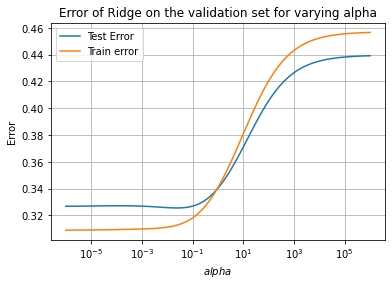

In [123]:
alpha_line = np.logspace(6, -6, 100)  
val_err_line = []
train_err_line = []
for a in c_line:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    y_pred_train = ridge.predict(X_train)
    train_err_line.append(evaluate(y_pred_train, y_train))
    y_pred = ridge.predict(X_test)
    val_err_line.append(evaluate(y_pred,y_test))
alpha_opt = alpha_line[np.argmin(val_err_line)]
print("Alpha optimal : ", alpha_opt)
plt.plot(alpha_line, val_err_line, label = "Test Error")
plt.plot(alpha_line, train_err_line, label = "Train error")
plt.xlabel("$alpha$")
plt.ylabel("Error")
plt.title("Error of Ridge on the validation set for varying alpha")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.show()

<br>
<font size=7 color=#009999>  3. From regressor to classifier </font> <br><br> 

In this very short part, we ask you to convert your regressor to a classifier: instead of predicting the progression of diabete disease, you are going to predict <b>whether a patient is sick</b>.

A simple way of doing such transformation is the <i>tresholding</i>: given a treshold $y_{\textrm{tresh}}$, we return $0$ if our prediction $y_{\textrm{pred}} < y_{\textrm{tresh}}$ and 1 otherwise.


<div class="alert alert-warning">
<b>[Question 8]</b>  <br>
    <ol>
    <li> Use your model of the previous part to design a binary classifier. You can use the mean of $y$ as treshold.
    <li> Compute the precision and recall of your classifier.
    </ol>
</div>

Please find below, a nice picture from [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall) to remind you about <i>precision</i> and <i>recall</i>.

<img src="precision_recall.png" width = "300">



In [154]:
from sklearn.metrics import confusion_matrix

#Tresholding 
y_tresh = np.mean(y_train) 
print(np.mean(y_train))
y_test_bin = (y_test > y_tresh)*1.0
y_train_bin = (y_train > y_tresh)*1.0

#TODO use your best method with its best parameters to find y_pred_bin 
# Caution, your model is still trained on the original data (X_train, y_train),
# the tresholding step occurs only at the very end.
alpha_opti = 0.02310129700083158
ridge = Ridge(alpha=alpha_opti)
ridge.fit(X_train, y_train)
y_pred_bin = (ridge.predict(X_test) > y_tresh)*1.0

#TODO find precision and recall
tn, fp, fn, tp = confusion_matrix(y_test_bin, y_pred_bin).ravel()
recall = tp/(tp+fp)
precision = tp/(tp+fn)

print(recall, precision)


155.1418918918919
0.6190476190476191 0.6724137931034483


There is obviously a trade-off between precision and recall, let us investigate it here.
<div class="alert alert-warning">
       
<b>[Question 9]</b>  <br>
Design a straightforward binary classifier with
<ol>
<li> a perfect precision
<li> a perfect recall
</ol>
Then, compare the three models and discuss whether precision or recall is the most important in our specific medical application.
</div>



In [185]:
# Perfect precision : on met le y_tresh très bas pour avoir fn = 0 et donc precision = 1 (exemple : y_tresh = 40)
# Perfect recall : on met le y_tresh très haut pour avoir fp = 0 et donc recall = 1 (exemple : y_tresh = 40)

#Tresholding 
y_tresh = 280

y_test_bin = (y_test > y_tresh)*1.0
y_train_bin = (y_train > y_tresh)*1.0

#TODO use your best method with its best parameters to find y_pred_bin 
# Caution, your model is still trained on the original data (X_train, y_train),
# the tresholding step occurs only at the very end.
alpha_opti = 0.02310129700083158
ridge = Ridge(alpha=alpha_opti)
ridge.fit(X_train, y_train)
y_pred_bin = (ridge.predict(X_test) > y_tresh)*1.0

#TODO find precision and recall
print(confusion_matrix(y_test_bin, y_pred_bin))
tn, fp, fn, tp = confusion_matrix(y_test_bin, y_pred_bin).ravel()
recall = tp/(tp+fp)
precision = tp/(tp+fn)

print(recall, precision)

[[137   2]
 [  7   0]]
0.0 0.0
